In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

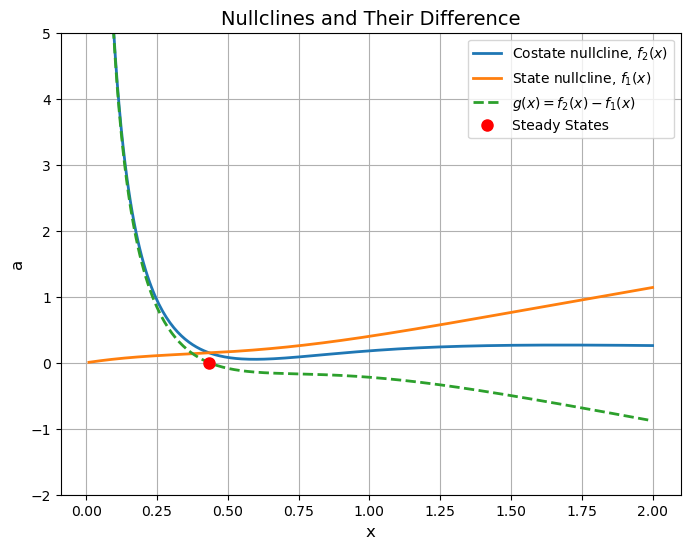

In [ ]:
def nullcline_a(x,p,b,c):
     return (p + b - (2*x)/((x**2 + 1)**2)) / (2 * c * x)

def nullcline_x(b,x):
    return b * x - (x**2) / ((x**2 + 1)**2)

b = 0.65
p = 0.03
c = 0.5
x = np.linspace(0.01,2,300)

f2 = nullcline_a(x, p, b, c)
f1 = nullcline_x(b, x)
g_x = f2 - f1

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, f2, label='Costate nullcline, $f_2(x)$', lw=2)
ax.plot(x, f1, label='State nullcline, $f_1(x)$', lw=2)

# Plot the difference g(x)
ax.plot(x, g_x, label='$g(x)=f_2(x)-f_1(x)$', lw=2, ls='--')

# Find and mark zeros of g(x) (steady states)
roots = []
for i in range(len(x)-1):
    if g_x[i] * g_x[i+1] < 0:
        root = fsolve(lambda xi: nullcline_a(xi, p, b, c) - nullcline_x(b, xi), (x[i] + x[i+1]) / 2)
        roots.append(root[0])
roots = np.array(roots)
if roots.size > 0:
    ax.plot(roots, np.zeros_like(roots), 'ro', markersize=8, label='Steady States')

# Customize the plot
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('a', fontsize=12)
ax.set_title('Nullclines and steady statae', fontsize=14)
ax.grid(True)
ax.legend(fontsize=10)
ax.set_ylim(-2, 5)

plt.show()
